# Predictive Analysis to determine the most likely potential future customers

## Objective:
To predict the most likely potential future customers to focus on, thus improving and sales efforts, lowering costs, and increase success.
<br>Springboard Capstone Project
<br>Matthew Walker
<br>22 Sept 2018

### Data Story:

#### Background:
There is a uptrend in residential solar photovoltaic array system in the past few years, and the industry is very competitive.  Companies are looking for any way to reduce costs and show their systems as cost effective compared to traditional electricity, and also to be competitive in the marketplace.
One of the largest costs for these companies is advertising and aquiring new customers.  Tesla for example has elimenated door to door sales for cost reasons, and is looking for cheaper, more effective ways of obtaining new customers.
If there were a way to identify potential future purchasers of solar array systems, I believe this could reduce costs by focusing sales efforts on this group of households, for a better return on sales efforts.

I found three datasets of surveys filled out by three different groups of households: 
    1. Adopters, households that have already purchased systems
    2. Considerers, households who have not yet purchased systems, but who are open to the idea and have looked into it
    3. GPS or G group, households that have not considered or looked into purchasing solar

My initial hypothesis about this data is that from the answers of those people that have purchased systems, there may be patterns that predict if other households are more likely to purchase.
I am thinking that with the two different datasets of households that did not yet purchase, I may see the considerers more closely correlated to the adopters answers, thus more likely to purchase in the future.
I need to determine which questions on the survey seem to be statistically significant and correlated to purchasing than others, and see if I can find similar patterns in the other datasets.
Questions:
    1. Is there a pattern to the adopters questions that can be used to predict future purchases?
    2. Does either the C group or G group show more correlation to the A group, and thus more likely to purchase in the future?
    3. Can I see these correlations or patterns in plots of these datasets?
    4. What insights can I gleen from these plots?
    5. Which features seem to be more important in predicting purchasing?
    
The following is my exploratory notebook into these questions.

Location of data: 
<br>https://openei.org/doe-opendata/dataset/understanding-the-evolution-of-customer-motivations-and-adoption-barriers-in-residential-solar-mar71 

alternate location:
https://data.nrel.gov/submissions/68

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import  pylab as p
from pylab import rcParams
import scipy.stats as stats
from scipy.stats import spearmanr

In [2]:
#bring in the datasets for adopter (has solar), considerer(thought about buying), and gps(have not thought of 
adopter= pd.read_csv('C:/Users/Matt/Desktop/datasets/ADOPTER.csv')
considerer = pd.read_csv('C:/Users/Matt/Desktop/datasets/CONSIDERER.csv')
gps= pd.read_csv('C:/Users/Matt/Desktop/datasets/GPS.csv')

In [3]:
considerer.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,HAVESOLAR,CONSIDEREDSOLAR,CONSIDER_SERIOUSLY,CONSIDER_ACTN1,CONSIDER_ACTN2,...,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,RETIRED_LAST5YRS,RETIRE_WHEN,RETIRE_WHEN_BINNED
0,2946,2,4,2,NaN,2,1,3,1,0,...,1,1,1.0,3,3,4,0,NaN,1.0,6.0
1,2947,2,4,3,NaN,2,1,2,1,1,...,1,0,2.0,2,1,4,0,NaN,1.0,5.0
2,2948,2,4,4,NaN,2,1,3,1,0,...,0,1,4.0,4,1,3,0,NaN,2.0,NaN
3,2949,2,4,4,NaN,2,1,3,1,1,...,0,0,3.0,1,2,4,1,0.0,NaN,NaN
4,2950,2,4,2,NaN,2,1,2,0,0,...,0,0,4.0,3,1,2,1,0.0,NaN,NaN


In [4]:
considerer.shape

(588, 201)

In [5]:
adopter.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,HAVESOLAR,PROMPT1,PROMPT2,PROMPT3,PROMPT4,...,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,RETIRED_LAST5YRS,RETIRE_WHEN,RETIRE_WHEN_BINNED
0,1342,3,2,4,NaN,1,0,0,1,0,...,0.0,0.0,4.0,4.0,2,5.0,1,1.0,NaN,NaN
1,1343,3,2,4,NaN,1,1,0,1,0,...,0.0,0.0,4.0,2.0,1,4.0,0,NaN,98.0,NaN
2,1344,3,2,4,NaN,1,0,0,0,0,...,99.0,99.0,NaN,99.0,99,99.0,99,NaN,NaN,NaN
3,1345,3,2,4,NaN,1,0,0,1,0,...,1.0,0.0,2.0,2.0,2,3.0,0,NaN,98.0,NaN
4,1346,3,2,4,NaN,1,0,0,1,0,...,0.0,1.0,2.0,2.0,2,1.0,0,NaN,98.0,NaN


In [6]:
adopter.shape

(1604, 255)

In [7]:
gps.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,HOME,STATE,AGE_BINNED,EDUC_BINNED,F1,F2,TRIG1,...,SQFT_BINNED,GENDER,PEOPLE_TOT_3PLUS,HAVE_KIDS,EMPLOY_1,EMPLOY_2,EMPLOY_5,RETIRED,FINANCIAL,INCOME_BINNED
0,1,1,1,1,1,4.0,4,1,0,0,...,3,0,0.0,0,0,0,0,1,2,3
1,2,1,1,1,4,3.0,4,1,1,0,...,3,1,0.0,0,1,0,0,0,2,4
2,3,1,1,1,2,4.0,1,1,1,0,...,4,0,0.0,0,0,0,0,1,1,95
3,4,1,1,1,4,4.0,2,0,1,1,...,2,0,0.0,0,0,0,0,1,1,4
4,5,1,1,1,4,4.0,1,0,1,1,...,3,0,0.0,0,0,0,0,1,2,3


In [8]:
gps.shape

(1341, 123)

#### Each dataset has a different number of columns. I need to find out which columns they all have in common, so as to compare them.

In [9]:
#find out how many columns are in all datasets (adopter, considerer and gps)
c_index = considerer.columns
a_index = adopter.columns
a_c_cols = c_index.intersection(a_index)

In [10]:
#columns in common in a and c datasets
a_c_cols

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'HAVESOLAR', 'PROMPT1', 'PROMPT2', 'PROMPT3', 'PROMPT4',
       ...
       'HAVE_KIDS', 'GENDER', 'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL',
       'INCOME_BINNED', 'RETIRED', 'RETIRED_LAST5YRS', 'RETIRE_WHEN',
       'RETIRE_WHEN_BINNED'],
      dtype='object', length=142)

In [11]:
#do the same for the gps dataset
g_index = gps.columns
a_c_g_cols = a_c_cols.intersection(g_index)

In [12]:
#columns in common in all three datasets
a_c_g_cols

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype='object')

In [13]:
#how many features are in all three datasets
a_c_g_cols.value_counts().sum() 

49

In [14]:
#create new datasets with dropped columns, so only comparable columns exist
a_comparable = adopter[a_c_g_cols] #should now contain only relatable columns, repeat for c and c datasets
c_comparable = considerer[a_c_g_cols]
g_comparable = gps[a_c_g_cols]

a_c_g_cols_ar = np.array(a_c_g_cols)
a_c_g_cols_ar #may not need this, but found it difficult to work with an index object...

array(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3',
       'E2', 'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1',
       'VB2', 'VB3', 'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1',
       'VE2', 'VE4', 'VO1', 'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3',
       'CNS1', 'CNS2', 'CNS4', 'SQFT_BINNED', 'STANCE',
       'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER', 'AGE_BINNED',
       'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype=object)

In [15]:
a_comparable.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
0,1342,3,2,4,NaN,4.0,9.0,4,4,4,...,1.0,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1
1,1343,3,2,4,NaN,7.0,11.0,4,4,5,...,2.0,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0
2,1344,3,2,4,NaN,NaN,NaN,4,4,3,...,4.0,90,NaN,99.0,99.0,NaN,99.0,99,99.0,99
3,1345,3,2,4,NaN,11.0,11.0,1,1,1,...,NaN,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0
4,1346,3,2,4,NaN,5.0,7.0,5,3,4,...,4.0,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0


#### Investigation into the amount of data missing within the comparable features:

In [16]:
#calculate the percent of missing data:
#set option to consider inf as missing data:
pd.options.mode.use_inf_as_na = True
a_comp_nulls = a_comparable.isnull().sum()/len(a_comparable)*100
a_comp_nulls = a_comp_nulls[a_comp_nulls !=0] #remove the features that are not missing data
print("Percent missing data:")
print(a_comp_nulls)

Percent missing data:
HOME                  95.324190
WINTER_NOPV_BINNED     8.291771
SUMMER_NOPV_BINNED     9.102244
SQFT_BINNED           11.221945
PEOPLE_TOT_3PLUS       8.728180
HAVE_KIDS              0.187032
GENDER                 0.561097
AGE_BINNED             7.356608
EDUC_BINNED            9.289277
INCOME_BINNED          3.366584
dtype: float64


In [17]:
#HOME feature missing 95% of data-drop the HOME column
a_comparable = a_comparable.drop('HOME', axis=1)

In [18]:
#calculate the number of missing data:
a_comp_nulls_count = a_comparable.isnull().sum()
a_comp_nulls_count = a_comp_nulls_count[a_comp_nulls_count !=0] #remove the features that are not missing data
print("Count of missing data:")
print(a_comp_nulls_count)

Count of missing data:
WINTER_NOPV_BINNED    133
SUMMER_NOPV_BINNED    146
SQFT_BINNED           180
PEOPLE_TOT_3PLUS      140
HAVE_KIDS               3
GENDER                  9
AGE_BINNED            118
EDUC_BINNED           149
INCOME_BINNED          54
dtype: int64


#### Some features may be filled in with their mean values

In [19]:
#find winter mean
a_winter_mean = a_comparable.WINTER_NOPV_BINNED.mean()
#fill in missing data with mean
a_comparable.WINTER_NOPV_BINNED.fillna(a_winter_mean, inplace=True)
#get a count (to see if fill worked)
a_comparable['WINTER_NOPV_BINNED'].isnull().sum()

0

In [20]:
#do this for summer feature as well
#find summer mean
a_summer_mean = a_comparable.SUMMER_NOPV_BINNED.mean()
#fill in missing data with mean
a_comparable.SUMMER_NOPV_BINNED.fillna(a_summer_mean, inplace=True)
#get a count (to see if fill worked)
a_comparable['SUMMER_NOPV_BINNED'].isnull().sum()

0

In [21]:
#and for SQFT
#find SQFT mean
a_SQFT_mean = a_comparable.SQFT_BINNED.mean()
#fill in missing data with mean
a_comparable.SQFT_BINNED.fillna(a_SQFT_mean, inplace=True)
#get a count (to see if fill worked)
a_comparable['SQFT_BINNED'].isnull().sum()

0

#### Others have a skew already in the data, and have a low number of missing values, so populating the missing data with the higher group should not alter the results too much.

In [22]:
#how does gender counts look
a_comparable.groupby('GENDER').nunique()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
GENDER,,,,,,,,,,,,,,,,,,,,,
0.0,1009,1,2,4,12,12,7,7,7,7,...,5,8,2,3,1,4,5,5,7,3
1.0,553,1,2,4,12,12,7,7,7,7,...,5,8,2,3,1,4,5,5,7,3
99.0,33,1,2,4,9,9,6,7,6,6,...,5,5,2,3,1,4,4,3,7,3


In [23]:
#can just set the 9 nulls to 0.0
a_comparable['GENDER'].fillna(0.0, inplace=True)
a_comparable['GENDER'].isnull().sum()

0

In [24]:
#how does 'HAVE_KIDS' counts look
a_comparable.groupby('HAVE_KIDS').nunique()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
HAVE_KIDS,,,,,,,,,,,,,,,,,,,,,
0.0,1027,1,2,4,12,12,7,7,7,7,...,5,8,2,1,3,4,5,5,7,3
1.0,447,1,2,4,12,12,6,7,6,6,...,5,8,2,1,3,4,5,5,7,3
99.0,127,1,2,4,12,12,7,7,7,7,...,5,8,0,1,3,4,5,5,7,3


In [25]:
#can just set the 3 nulls to 0.0
a_comparable['HAVE_KIDS'].fillna(0.0, inplace=True)
a_comparable['HAVE_KIDS'].isnull().sum()

0

#### The remaining missing data seem to be evenly dispersed in their values, so maybe filling using ffill will keep this even distribution, without skewing the data  too much.

In [26]:
#Look at PEOPLE_TOT_3PLUS feature
#how does 'HAVE_KIDS' counts look
a_comparable.groupby('PEOPLE_TOT_3PLUS').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
PEOPLE_TOT_3PLUS,,,,,,,,,,,,,,,,,,,,,
0.0,746,746,746,746,746,746,746,746,746,746,...,746,746,746,746,746,703,667,746,725,746
1.0,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,673,656,718,692,718


In [27]:
#can just set the 140 nulls to either value, randomly, but using forward fill
a_comparable['PEOPLE_TOT_3PLUS'].fillna(method='ffill', inplace=True)
a_comparable['PEOPLE_TOT_3PLUS'].isnull().sum()

0

In [28]:
#Now look at PEOPLE_TOT_3PLUS feature to see if ffill filled nulls aprox. equally(orig count: 0.0-746, 1.0-718)
#how does 'HAVE_KIDS' counts look
a_comparable.groupby('PEOPLE_TOT_3PLUS').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
PEOPLE_TOT_3PLUS,,,,,,,,,,,,,,,,,,,,,
0.0,811,811,811,811,811,811,811,811,811,811,...,811,811,811,811,811,757,728,811,785,811
1.0,793,793,793,793,793,793,793,793,793,793,...,793,793,793,793,793,729,727,793,765,793


In [29]:
#counts now 0.0-811(65 more), 1.0-793(75 more), still fairly even

#Look at AGE_BINNED feature
#how does 'AGE_BINNED' counts look
a_comparable.groupby('AGE_BINNED').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
AGE_BINNED,,,,,,,,,,,,,,,,,,,,,
1.0,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,213,244,241,244
2.0,323,323,323,323,323,323,323,323,323,323,...,323,323,323,323,323,323,296,323,306,323
3.0,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,409,455,439,455
4.0,464,464,464,464,464,464,464,464,464,464,...,464,464,464,464,464,464,422,464,446,464


In [30]:
#largest group is 4.0, and there are 118 nulls...
#could fill nulls as before, randomly like with PEOPLE_TOT_3PLUS
a_comparable['AGE_BINNED'].fillna(method='ffill', inplace=True)
a_comparable['AGE_BINNED'].isnull().sum()

0

In [31]:
#how to handle the last two features: Education and income?
#let's look at the distribution
a_comparable.groupby('EDUC_BINNED').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
EDUC_BINNED,,,,,,,,,,,,,,,,,,,,,
1.0,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,100,104
2.0,502,502,502,502,502,502,502,502,502,502,...,502,502,502,502,502,502,502,502,479,502
3.0,444,444,444,444,444,444,444,444,444,444,...,444,444,444,444,444,444,444,444,429,444
4.0,377,377,377,377,377,377,377,377,377,377,...,377,377,377,377,377,377,377,377,366,377
99.0,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,27,28


In [32]:
#and income:
a_comparable.groupby('INCOME_BINNED').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,RETIRED
INCOME_BINNED,,,,,,,,,,,,,,,,,,,,,
1.0,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,121,132,132
2.0,224,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,211,224,224
3.0,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,187,208,208
4.0,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,320,359,359
5.0,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,257,289,289
95.0,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,236,266,266
99.0,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,69,72,72


In [33]:
#for now, let's ffill them both, just to clear missing  data, and run some inferential stats
#we may need to revert all this if this is not the best way, or just to see if there are differences

#Education
a_comparable['EDUC_BINNED'].fillna(method='ffill', inplace=True)
a_comparable['EDUC_BINNED'].isnull().sum()

#Income
a_comparable['INCOME_BINNED'].fillna(method='ffill', inplace=True)
a_comparable['INCOME_BINNED'].isnull().sum()

0

In [34]:
#Finally, re-calculate the percent of missing data:
a_comp_nulls_count = a_comparable.isnull().sum()
a_comp_nulls_count = a_comp_nulls_count[a_comp_nulls_count !=0] #remove the features that are not missing data
print("Count of missing data:")
print(a_comp_nulls_count)

Count of missing data:
Series([], dtype: int64)


#### Summary of filling in the missing data for the Adopters dataset:
-  'Home'-removed, since so much is missing
-  'Winter/Summer bills w/o PV'-filled with mean
-  'SQFT'-filled with mean
-  'Have Kids/Gender'-filled with prevailing value
-  'People-total >=3'-filled with ffill to maintain even distribution
-  'age'-filled with ffill to maintain even distribution
-  'education'-filled with ffill to maintain even distribution
-  'income'-filled with ffill to maintain even distribution

#### Let's clean up the missing data in both C and G groups in the same was as was done for the A group.

In [35]:
#drop the HOME column
c_comparable = c_comparable.drop('HOME', axis=1)

#calculate the percent of missing data:
c_comp_nulls = c_comparable.isnull().sum()/len(c_comparable)*100
c_comp_nulls = c_comp_nulls[c_comp_nulls !=0]
print("Percent missing data:")
print(c_comp_nulls)

Percent missing data:
WINTER_NOPV_BINNED    2.551020
SUMMER_NOPV_BINNED    2.210884
PN2                   0.170068
E2                    0.170068
BB2                   0.170068
BE10                  0.170068
VT1                   0.170068
SQFT_BINNED           8.843537
PEOPLE_TOT_3PLUS      2.380952
AGE_BINNED            1.700680
dtype: float64


In [36]:
#calculate the percent of missing data:
c_comp_nulls_counts = c_comparable.isnull().sum()
c_comp_nulls_counts = c_comp_nulls_counts[c_comp_nulls_counts !=0]
print("Percent missing data:")
print(c_comp_nulls_counts)

Percent missing data:
WINTER_NOPV_BINNED    15
SUMMER_NOPV_BINNED    13
PN2                    1
E2                     1
BB2                    1
BE10                   1
VT1                    1
SQFT_BINNED           52
PEOPLE_TOT_3PLUS      14
AGE_BINNED            10
dtype: int64


In [37]:
#Fill in all null values as was done to a_comparable
#winter feature
c_winter_mean = c_comparable.WINTER_NOPV_BINNED.mean()
c_comparable.WINTER_NOPV_BINNED.fillna(c_winter_mean, inplace=True)

#summer feature
c_summer_mean = c_comparable.SUMMER_NOPV_BINNED.mean()
c_comparable.SUMMER_NOPV_BINNED.fillna(c_summer_mean, inplace=True)

#PN2, E2, BB2, BE10, VT1
c_comparable.PN2.fillna(method='ffill', inplace=True)
c_comparable.E2.fillna(method='ffill', inplace=True)
c_comparable.BB2.fillna(method='ffill', inplace=True)
c_comparable.BE10.fillna(method='ffill', inplace=True)
c_comparable.VT1.fillna(method='ffill', inplace=True)

#SQFT
c_comparable.SQFT_BINNED.fillna(a_SQFT_mean, inplace=True)

#people_tot feature
c_comparable['PEOPLE_TOT_3PLUS'].fillna(method='ffill', inplace=True)

#age feature
c_comparable['AGE_BINNED'].fillna(method='ffill', inplace=True)

#re-calculate the percent of missing data once all data is deleted/populated:
c_comp_nulls = c_comparable.isnull().sum()/len(c_comparable)*100
c_comp_nulls = c_comp_nulls[c_comp_nulls !=0]
print("Percent missing data:")
print(c_comp_nulls)

Percent missing data:
Series([], dtype: float64)


In [38]:
#drop the HOME column
g_comparable = g_comparable.drop('HOME', axis=1)

#calculate the percent of missing data:
g_comp_nulls = g_comparable.isnull().sum()/len(g_comparable)*100
g_comp_nulls = g_comp_nulls[g_comp_nulls !=0]
print("Percent missing data:")
print(g_comp_nulls)

Percent missing data:
WINTER_NOPV_BINNED    8.277405
SUMMER_NOPV_BINNED    8.426547
PEOPLE_TOT_3PLUS      1.789709
AGE_BINNED            0.149142
dtype: float64


In [39]:
#Fill in all null values as was done to a_comparable
#winter feature
g_winter_mean = g_comparable.WINTER_NOPV_BINNED.mean()
g_comparable.WINTER_NOPV_BINNED.fillna(g_winter_mean, inplace=True)

#summer feature
g_summer_mean = g_comparable.SUMMER_NOPV_BINNED.mean()
g_comparable.SUMMER_NOPV_BINNED.fillna(g_summer_mean, inplace=True)

#people_tot feature
g_comparable['PEOPLE_TOT_3PLUS'].fillna(method='ffill', inplace=True)

#age feature
g_comparable['AGE_BINNED'].fillna(method='ffill', inplace=True)

#re-calculate the percent of missing data(should all be zero now)
g_comp_nulls_filled = g_comparable.isnull().sum()/len(g_comparable)*100
g_comp_nulls_filled = g_comp_nulls_filled[g_comp_nulls_filled !=0]
print("Percent missing data:")
print(g_comp_nulls_filled)

Percent missing data:
Series([], dtype: float64)


#### Now, all nulls are filled for A, C, and G groups.

#### Taking a look at some data that may be a predictor of someone purchasing-Income:

In [40]:
a_count = a_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
a_count

INCOME_BINNED
1.0     137
2.0     232
3.0     215
4.0     374
5.0     296
95.0    277
99.0     73
Name: INCOME_BINNED, dtype: int64

In [41]:
#Percent breakdown of income feature in A group
a_counts = a_count.apply(lambda x: 100 * x/a_count.sum())
a_counts.rename('Adopter', inplace=True)
a_counts

INCOME_BINNED
1.0      8.541147
2.0     14.463840
3.0     13.403990
4.0     23.316708
5.0     18.453865
95.0    17.269327
99.0     4.551122
Name: Adopter, dtype: float64

In [42]:
c_count = c_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
c_count

INCOME_BINNED
1     104
2     104
3     121
4     120
5      89
95     40
99     10
Name: INCOME_BINNED, dtype: int64

In [43]:
#compare income A counts to C group
c_counts = c_count.apply(lambda x: 100 * x/c_count.sum())
c_counts.rename('Considerer', inplace=True)
c_counts

INCOME_BINNED
1     17.687075
2     17.687075
3     20.578231
4     20.408163
5     15.136054
95     6.802721
99     1.700680
Name: Considerer, dtype: float64

In [44]:
#seeing more upper income on adopters than in considerer group.

In [45]:
g_count = g_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
g_counts = g_count.apply(lambda x: 100 * x/g_count.sum())
g_counts.rename('GPS', inplace=True)
g_counts

INCOME_BINNED
1     17.225951
2     18.568233
3     18.642804
4     18.568233
5     11.185682
95    15.734526
99     0.074571
Name: GPS, dtype: float64

In [46]:
plt.rcParams['figure.figsize'] = (16,5)

Adopter       AxesSubplot(0.125,0.125;0.775x0.755)
Considerer    AxesSubplot(0.125,0.125;0.775x0.755)
GPS           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

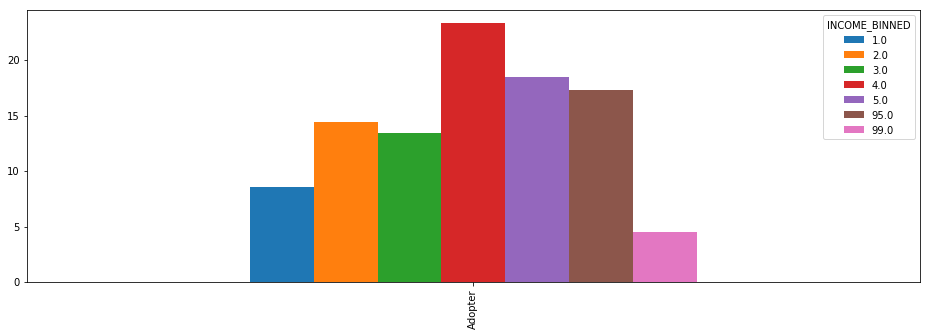

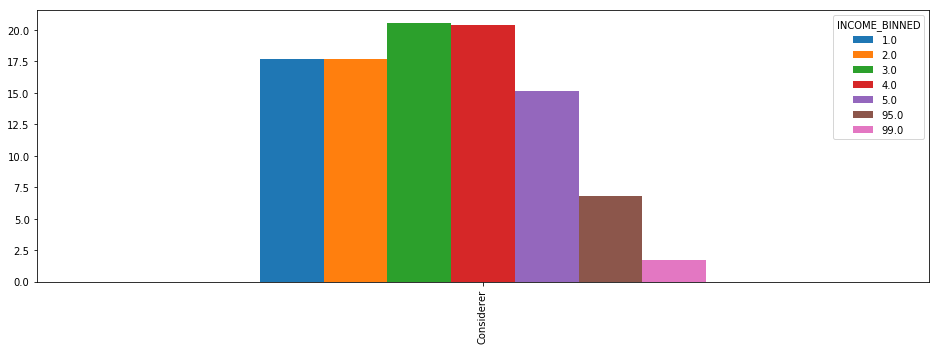

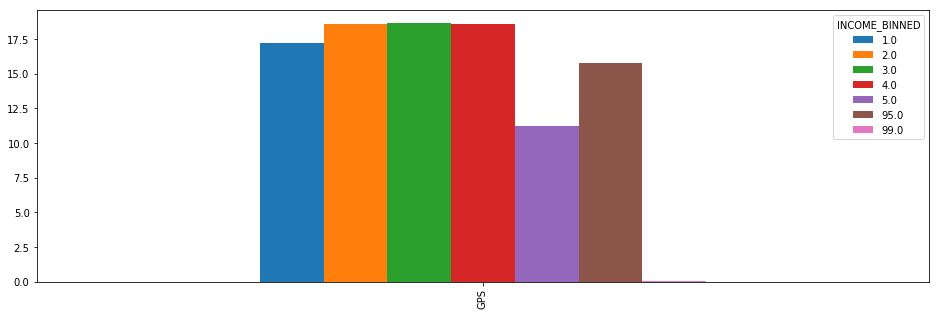

In [47]:
#and even more so in the gps (not considering) group.
all_income = pd.DataFrame()
all_income.append([a_counts, c_counts, g_counts]).groupby(level=0).plot(kind='bar')

In [48]:
#Add target class to all datasets-
a_comparable['Purchased'] = '1'
c_comparable['Purchased'] = '0'
g_comparable['Purchased'] = '0'

In [49]:
#make all dataset's features categorical
g_comparable_cat = g_comparable[g_comparable.columns].astype('category')
g_comparable_cat.set_index('CASE_ID')
g_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
count,1341,1341,1341,1341,1341.0,1341.0,1341,1341,1341,1341,...,1341,1341.0,1341,1341,1341.0,1341,1341,1341,1341,1341
unique,1341,1,1,4,12.0,12.0,6,6,6,6,...,8,2.0,3,3,4.0,4,5,7,2,1
top,1341,1,1,3,5.0,5.0,4,4,4,4,...,3,0.0,0,1,4.0,2,1,3,0,0
freq,1,1341,1341,351,297.0,254.0,504,555,673,466,...,437,866.0,1034,795,377.0,456,614,250,857,1341


In [50]:
#adding in a target column, and populating the G group with 0 (have not purchased)
#g_comparable_cat['Purchased'] = '0'
g_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1,1,1,1,6.0,4.0,3,3,3,4,...,2,0.0,0,0,4.0,4,2,3,1,0
1,2,1,1,4,7.0,8.0,5,5,3,5,...,2,0.0,0,1,3.0,4,2,4,0,0
2,3,1,1,2,5.0,5.0,3,3,4,4,...,4,0.0,0,0,4.0,1,1,95,1,0
3,4,1,1,4,3.0,2.0,3,3,3,4,...,4,0.0,0,0,4.0,2,1,4,1,0
4,5,1,1,4,4.0,3.0,4,4,4,4,...,97,0.0,0,0,4.0,1,2,3,1,0


In [51]:
a_comparable_cat = a_comparable[a_comparable.columns].astype('category')
a_comparable_cat.set_index('CASE_ID')
a_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
count,1604,1604,1604,1604,1604.0,1604.0,1604,1604,1604,1604,...,1604,1604.0,1604.0,1604.0,1604.0,1604.0,1604,1604.0,1604,1604
unique,1604,1,2,4,12.0,12.0,7,7,7,7,...,8,2.0,3.0,3.0,4.0,5.0,5,7.0,3,1
top,2945,3,2,4,5.0,11.0,5,5,4,5,...,3,0.0,0.0,0.0,3.0,2.0,1,4.0,0,1
freq,1,1604,1529,1176,312.0,285.0,543,505,657,672,...,494,811.0,1030.0,1018.0,497.0,557.0,835,374.0,996,1604


In [52]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
a_comparable_cat['Purchased'] = 1
a_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1342,3,2,4,4.000000,9.000000,4,4,4,5,...,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1,1
1,1343,3,2,4,7.000000,11.000000,4,4,5,4,...,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0,1
2,1344,3,2,4,6.201224,7.469136,4,4,3,4,...,90,0.0,99.0,99.0,4.0,99.0,99,99.0,99,1
3,1345,3,2,4,11.000000,11.000000,1,1,1,3,...,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0,1
4,1346,3,2,4,5.000000,7.000000,5,3,4,3,...,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0,1


In [53]:
c_comparable_cat = c_comparable[c_comparable.columns].astype('category')
c_comparable_cat.set_index('CASE_ID')
c_comparable['CASE_ID'].rename('ID')
c_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
count,588,588,588,588,588.0,588.0,588,588.0,588,588.0,...,588,588.0,588,588,588.0,588,588,588,588,588
unique,588,1,2,4,12.0,12.0,6,6.0,6,6.0,...,8,2.0,3,3,4.0,4,5,7,3,1
top,3533,2,5,4,5.0,5.0,4,4.0,4,5.0,...,3,1.0,0,0,1.0,4,1,3,0,0
freq,1,588,436,187,145.0,96.0,200,200.0,233,249.0,...,183,325.0,317,323,276.0,178,284,121,468,588


In [54]:
#adding in a target column, and populating the C group with 0 (have not purchased)
c_comparable_cat['Purchased'] = '0'
c_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,2946,2,4,2,5.0,6.0,3,3.0,2,4.0,...,97,1.0,1,1,1.0,3,3,4,0,0
1,2947,2,4,3,6.0,11.0,3,3.0,3,1.0,...,4,1.0,1,0,2.0,2,1,4,0,0
2,2948,2,4,4,6.0,7.0,5,5.0,3,5.0,...,1,1.0,0,1,4.0,4,1,3,0,0
3,2949,2,4,4,5.0,5.0,2,2.0,2,2.0,...,3,1.0,0,0,3.0,1,2,4,1,0
4,2950,2,4,2,9.0,5.0,4,4.0,3,4.0,...,4,0.0,0,0,4.0,3,1,2,1,0


In [55]:
a_comparable.columns

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED',
       'Purchased'],
      dtype='object')

In [56]:
a_comparable.PN1.value_counts()

5     543
4     540
3     331
1      92
2      73
98     16
99      9
Name: PN1, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B2366C88>]],
      dtype=object)

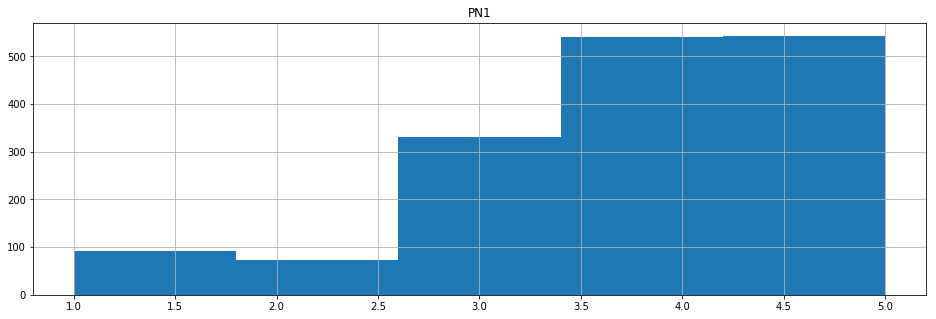

In [57]:
#### plot features in comparison to each other, and datasets against one another
a_noOutliers = a_comparable[a_comparable['PN1'] < 98]
a_noOutliers.hist(column='PN1', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B26D6EB8>]],
      dtype=object)

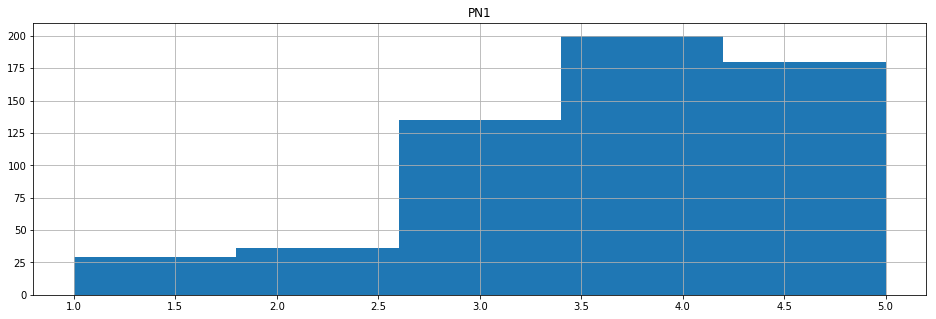

In [58]:
#### plot features in comparison to each other, and datasets against one another
c_noOutliers = c_comparable[c_comparable['PN1'] < 98]
c_noOutliers.hist(column='PN1', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B242A208>]],
      dtype=object)

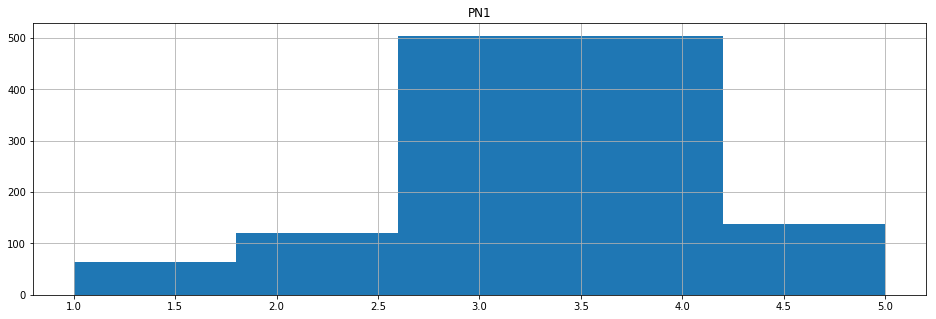

In [59]:
#### plot features in comparison to each other, and datasets against one another
g_noOutliers = g_comparable[g_comparable['PN1'] < 98]
g_noOutliers.hist(column='PN1', bins=5)

In [60]:
a_comparable['EDUC_BINNED'].value_counts()

2.0     557
3.0     486
4.0     411
1.0     115
99.0     35
Name: EDUC_BINNED, dtype: int64

In [61]:
#Combine all datasets together
combined = pd.concat([a_comparable, c_comparable, g_comparable], sort=False)

In [62]:
combined.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1342,3,2,4,4.000000,9.000000,4,4.0,4,5.0,...,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1,1
1,1343,3,2,4,7.000000,11.000000,4,4.0,5,4.0,...,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0,1
2,1344,3,2,4,6.201224,7.469136,4,4.0,3,4.0,...,90,0.0,99.0,99.0,4.0,99.0,99,99.0,99,1
3,1345,3,2,4,11.000000,11.000000,1,1.0,1,3.0,...,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0,1
4,1346,3,2,4,5.000000,7.000000,5,3.0,4,3.0,...,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0,1


#### EDA on combined dataset, with Purchased class fully populated

In [64]:
plt.rcParams['figure.figsize'] = (20,10)
#combined.loc[:, 'WINTER_NOPV_BINNED':].boxplot(sym='')#ignoring the outliers so as to expand the view of the other data

In [65]:
#nullifying the outlier values of 99 and 98, used in survey for did not answer
a_comparable = a_comparable.replace(98,np.NaN)
a_comparable = a_comparable.replace(99,np.NaN)
c_comparable = c_comparable.replace(98,np.NaN)
c_comparable = c_comparable.replace(99,np.NaN)
g_comparable = g_comparable.replace(98,np.NaN)
g_comparable = g_comparable.replace(99,np.NaN)
#gender had a 95 for did not answer
a_comparable = a_comparable.replace(95,np.NaN)
c_comparable = c_comparable.replace(95,np.NaN)
g_comparable = g_comparable.replace(95,np.NaN)
#stance has 90-other and 97-don't know/no politcal party
a_comparable = a_comparable.replace(90,np.NaN)
c_comparable = c_comparable.replace(90,np.NaN)
g_comparable = g_comparable.replace(90,np.NaN)
a_comparable = a_comparable.replace(97,np.NaN)
c_comparable = c_comparable.replace(97,np.NaN)
g_comparable = g_comparable.replace(97,np.NaN)

#test at some point:
#g_comparable = g_comparable.replace(>=90,np.NaN)


				 WINTER_NOPV_BINNED


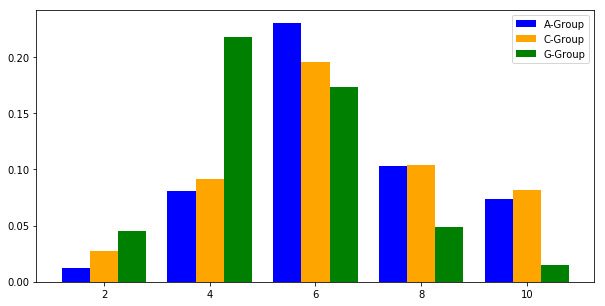


				 SUMMER_NOPV_BINNED


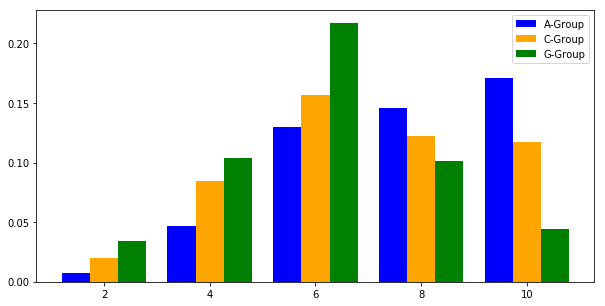


				 PN1


D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


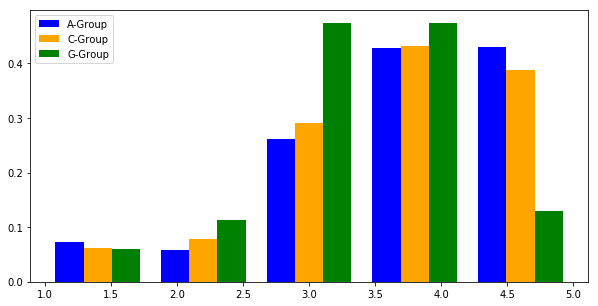


				 PN2


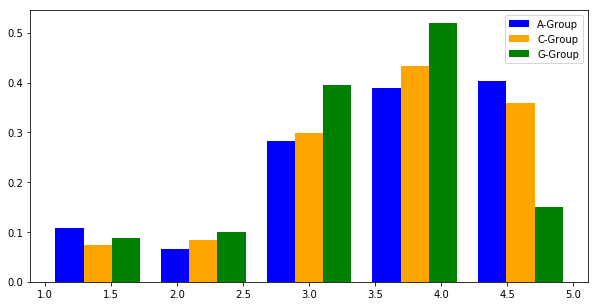


				 PN3


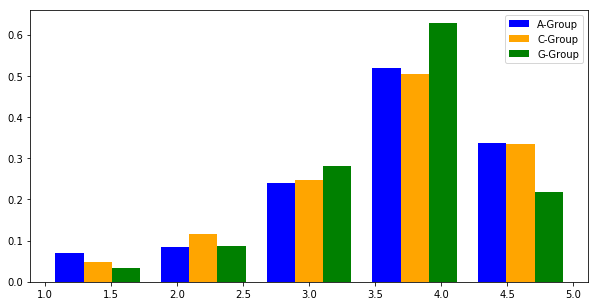


				 E2


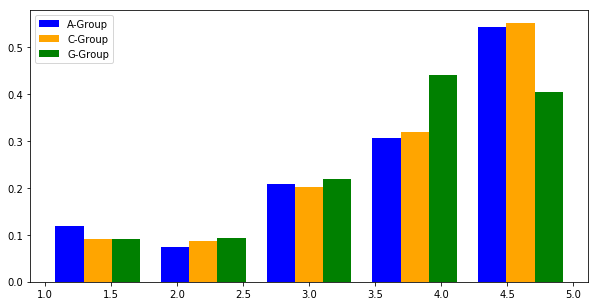


				 BB1


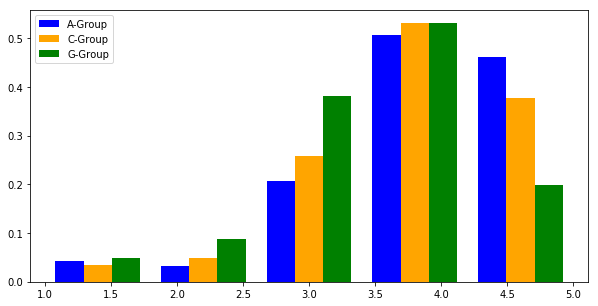


				 BB2


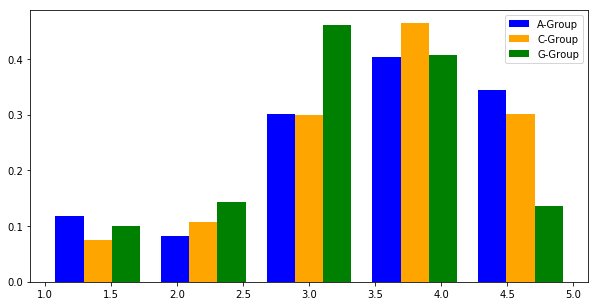


				 BB3


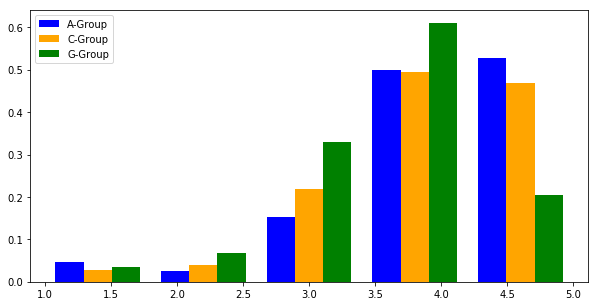


				 BTE8


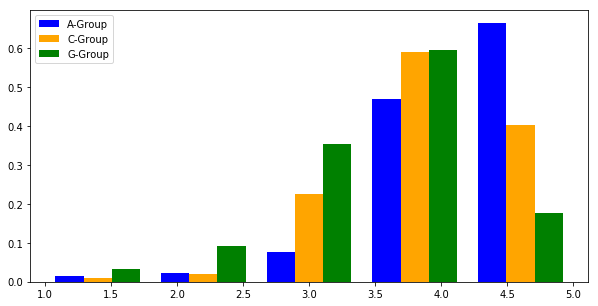


				 BE13


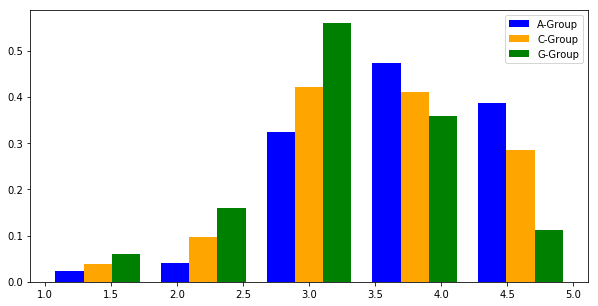


				 BE10


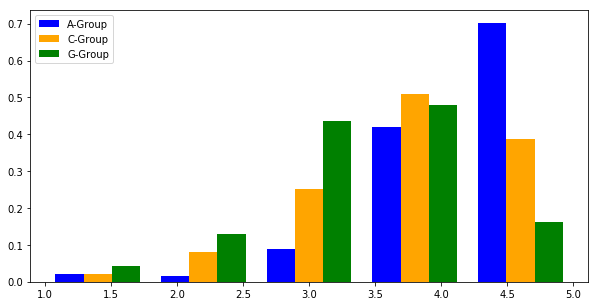


				 Co3


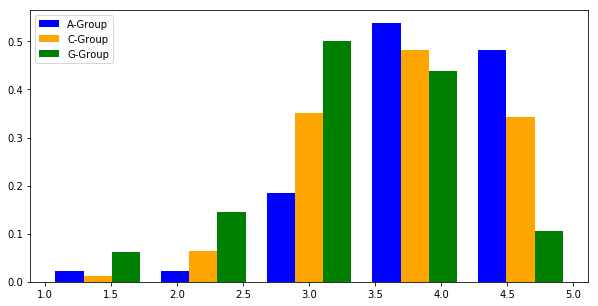


				 VB1


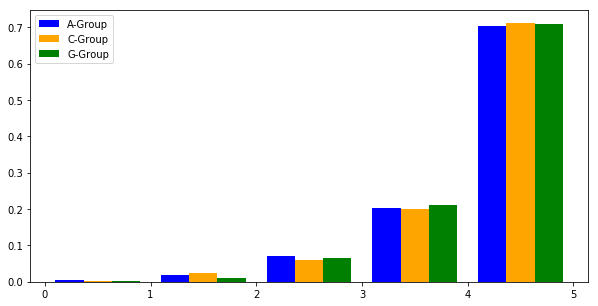


				 VB2


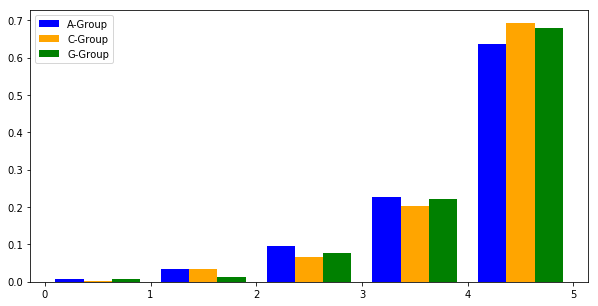


				 VB3


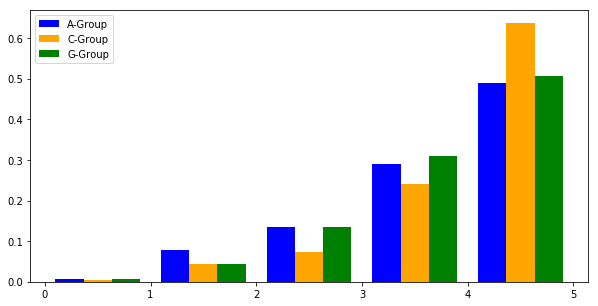


				 VA1


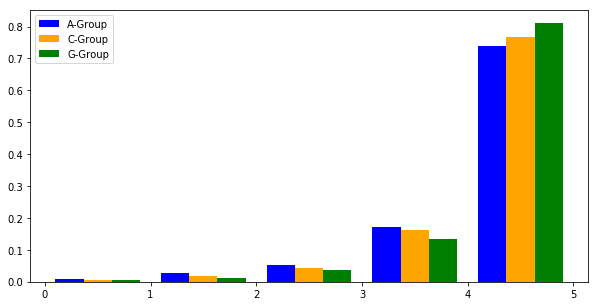


				 VA2


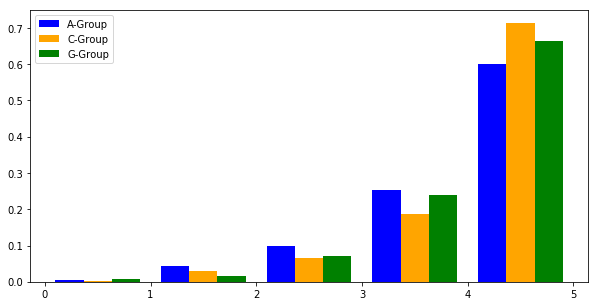


				 VA3


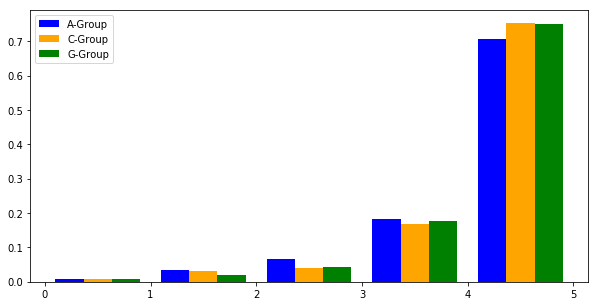


				 VT1


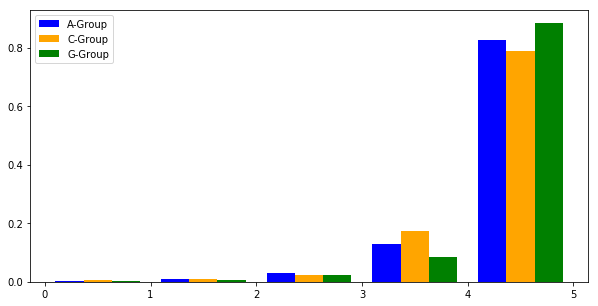


				 VT2


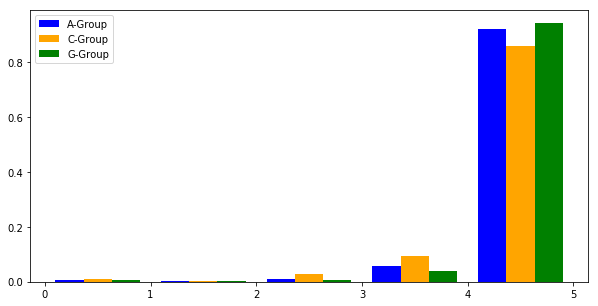


				 VT3


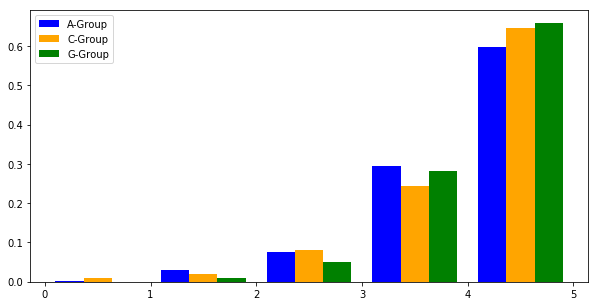


				 VE1


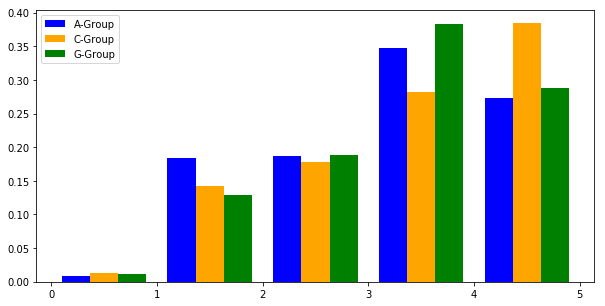


				 VE2


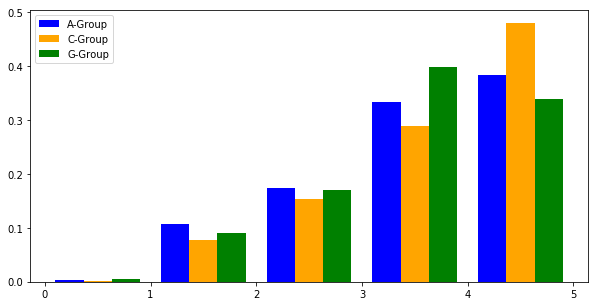


				 VE4


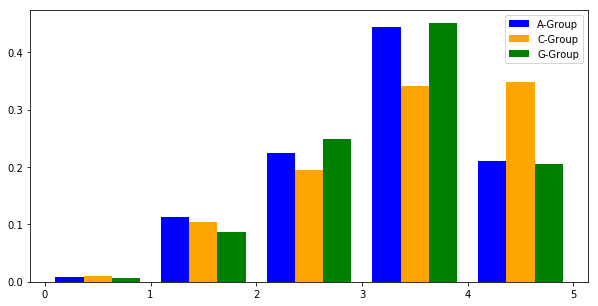


				 VO1


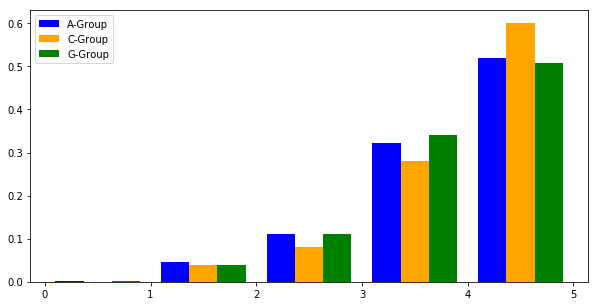


				 VO2


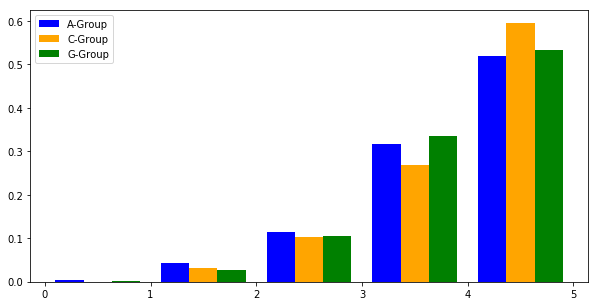


				 VO3


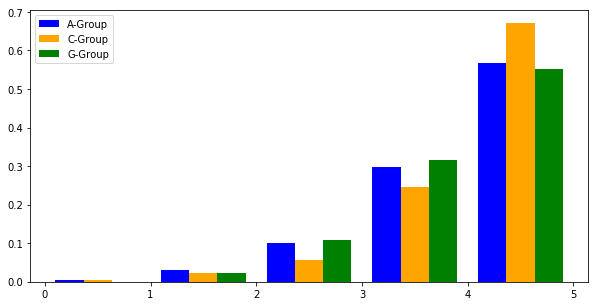


				 CIJM1


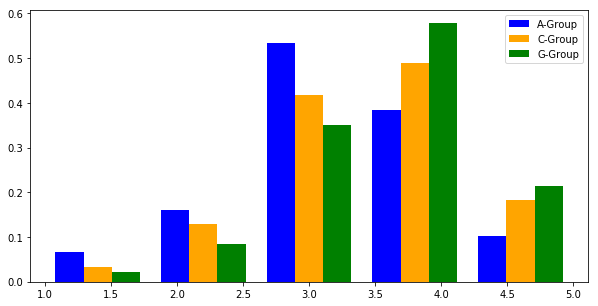


				 CIJM2


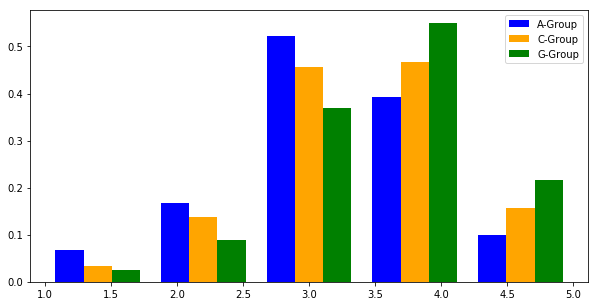


				 CIJM3


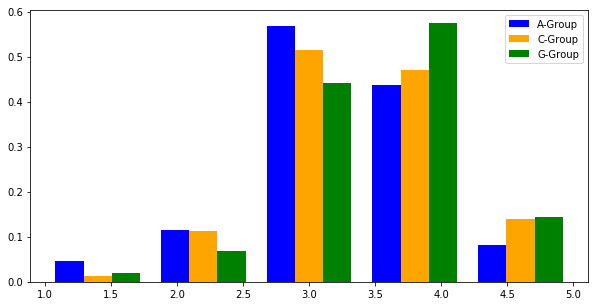


				 CNS1


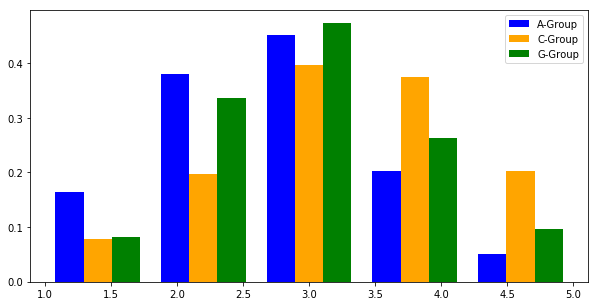


				 CNS2


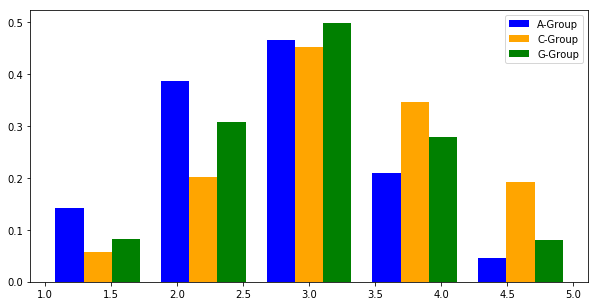


				 CNS4


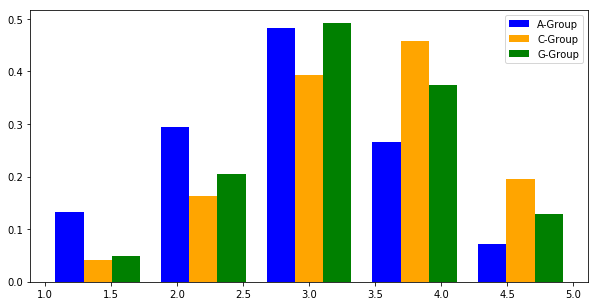


				 SQFT_BINNED


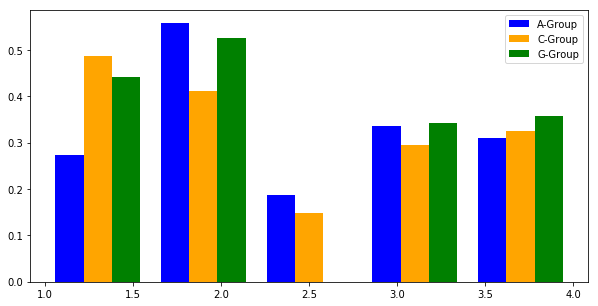


				 STANCE


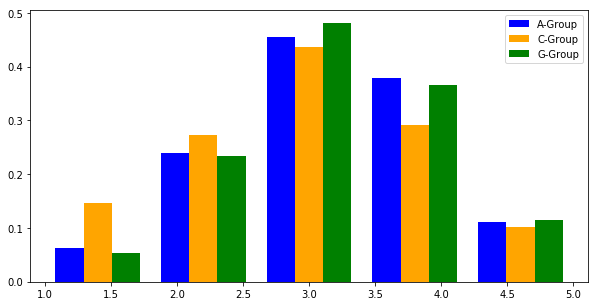


				 PEOPLE_TOT_3PLUS


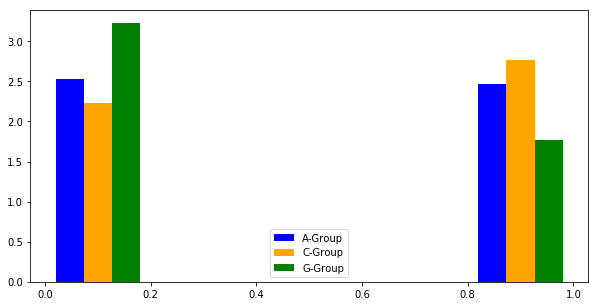


				 HAVE_KIDS


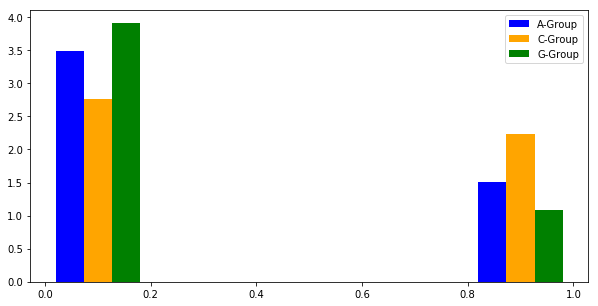


				 GENDER


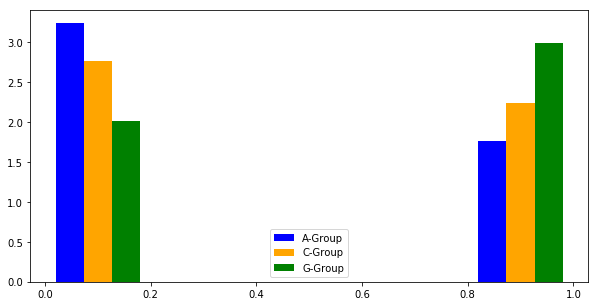


				 AGE_BINNED


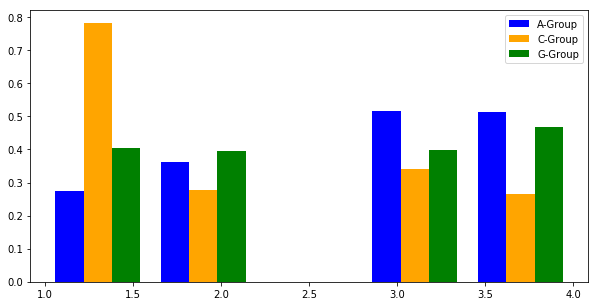


				 EDUC_BINNED


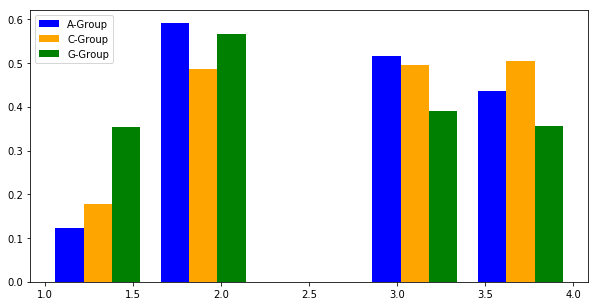


				 FINANCIAL


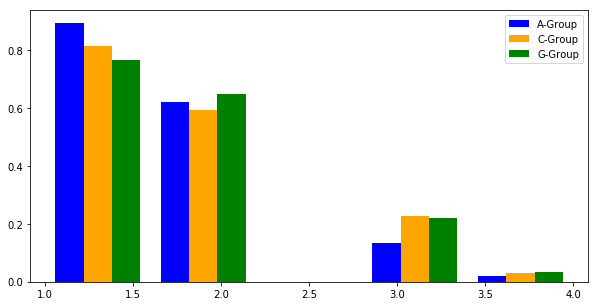


				 INCOME_BINNED


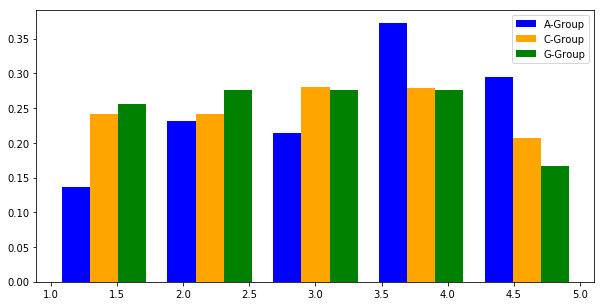


				 RETIRED


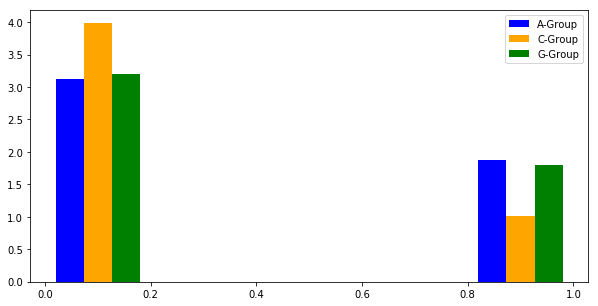

In [66]:
# Make a multiple-histogram of data-sets with different length.
plt.rcParams['figure.figsize'] = (10,5)

for i in range(4,48):
    col = str(a_comparable.columns[i])
    print('\n\t\t\t\t',col)
    x_multi = [a_comparable.loc[:, col], c_comparable.loc[:, col], g_comparable.loc[:, col]]
    n, bins, patches = p.hist(x_multi, 5, density=1, histtype='bar',
                            color=['blue', 'orange', 'green'],
                            label=['A-Group', 'C-Group', 'G-Group'])
    p.legend()
    plt.show()

#### features that visually seem to show importance:
- Winter_nopv_binned/Summer_nopv_binned-A group is slightly right skewed, with G group slightly left skewed
- CIJM(1-3)-"ask others/research products before buying"; seems that G group researches more (less impulse buying?)
- gender-G group predominantly female, A group is mostly male, C group slightly more male

#### Statistics on all features:

In [68]:
#loop through interesting features, and see if they are statistically significant
#run all features, if select desired: ['WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'CIJM1', 'CIJM2', 'CIJM3', 'GENDER']
features = list(a_comparable.columns)
#remove the first 4 features (not important or significant), and the last target class
features = features[4:-1]

for feature in features:
    print('\nTesting significance between A group and C group for feature: ',feature)
    print('Mean of A: ', np.mean(a_comparable[feature]))
    print('Mean of C: ', np.mean(c_comparable[feature]))

    #Independent samples t-test
    feature_ttest, feature_pval = stats.ttest_ind(a=a_comparable[feature], b=c_comparable[feature], equal_var=False,nan_policy='omit')
    print('The T-Statistic is %d with a p-value of %s' %(abs(feature_ttest), feature_pval))
    
    if feature_pval < 0.05:
        print('There is a significant difference between these two groups')
    else:
        print('P-value greater than 0.05, no significant difference.')
    
    print("\nAnd between A group and G group:")    

    print('Mean of A: ', np.mean(a_comparable[feature]))
    print('Mean of G: ', np.mean(g_comparable[feature]))

    #Independent samples t-test
    feature_ttest, feature_pval = stats.ttest_ind(a=a_comparable[feature], b=g_comparable[feature], equal_var=False,nan_policy='omit')
    print('The T-Statistic is %d with a p-value of %s' %(abs(feature_ttest), feature_pval))
    
    if feature_pval < 0.05:
        print('There is a significant difference between these two groups')
    else:
        print('P-value greater than 0.05, no significant difference.')


Testing significance between A group and C group for feature:  WINTER_NOPV_BINNED
Mean of A:  6.201223657375935
Mean of C:  6.010471204188482
The T-Statistic is 1 with a p-value of 0.08897057019106627
P-value greater than 0.05, no significant difference.

And between A group and G group:
Mean of A:  6.201223657375935
Mean of G:  4.67560975609756
The T-Statistic is 21 with a p-value of 3.371429986064247e-96
There is a significant difference between these two groups

Testing significance between A group and C group for feature:  SUMMER_NOPV_BINNED
Mean of A:  7.469135802469137
Mean of C:  6.568695652173913
The T-Statistic is 7 with a p-value of 1.1767249836412106e-13
There is a significant difference between these two groups

And between A group and G group:
Mean of A:  7.469135802469137
Mean of G:  5.5757328990228014
The T-Statistic is 22 with a p-value of 3.072286995989981e-106
There is a significant difference between these two groups

Testing significance between A group and C group

##### Features that stand out:
- Gender appears to be statistically significant, with p-values of 6.3e-5 and 7.2e-41 for C and G groups, respectively, when compared to the A group.
- The Winter electric costs seem to be significantly different for the G group when compared to the A group (p-value of 3.4e-96), but does not seem to be significant in the C group, with a p-value of 0.08.  This suggests that winter electric bills may have been a factor in A group purchasing solar, with the C group interested in reducing bills and thus considering purchasing, with less incentive for the G group to purchase.
- The Summer electric costs seem to be significantly different for the both the C and G groups when compared to the A group (p-values of 1.2e-13 and 3.1e-106, respectively).  This suggests that summer electric bills may have been a factor in A group purchasing solar, with the C and G groups less incentivised to reduce their bills and thus less inclined to purchasing solar.
- There seems to be a significant difference from the A group in both C and G groups for CIJM(1-3)(Before buying a new brand, I usually ask someone who has experience with the brand for advice.)
- Most significance seems to occur between A group and G group, with C group often not being significant, or having a higher p-value than G group

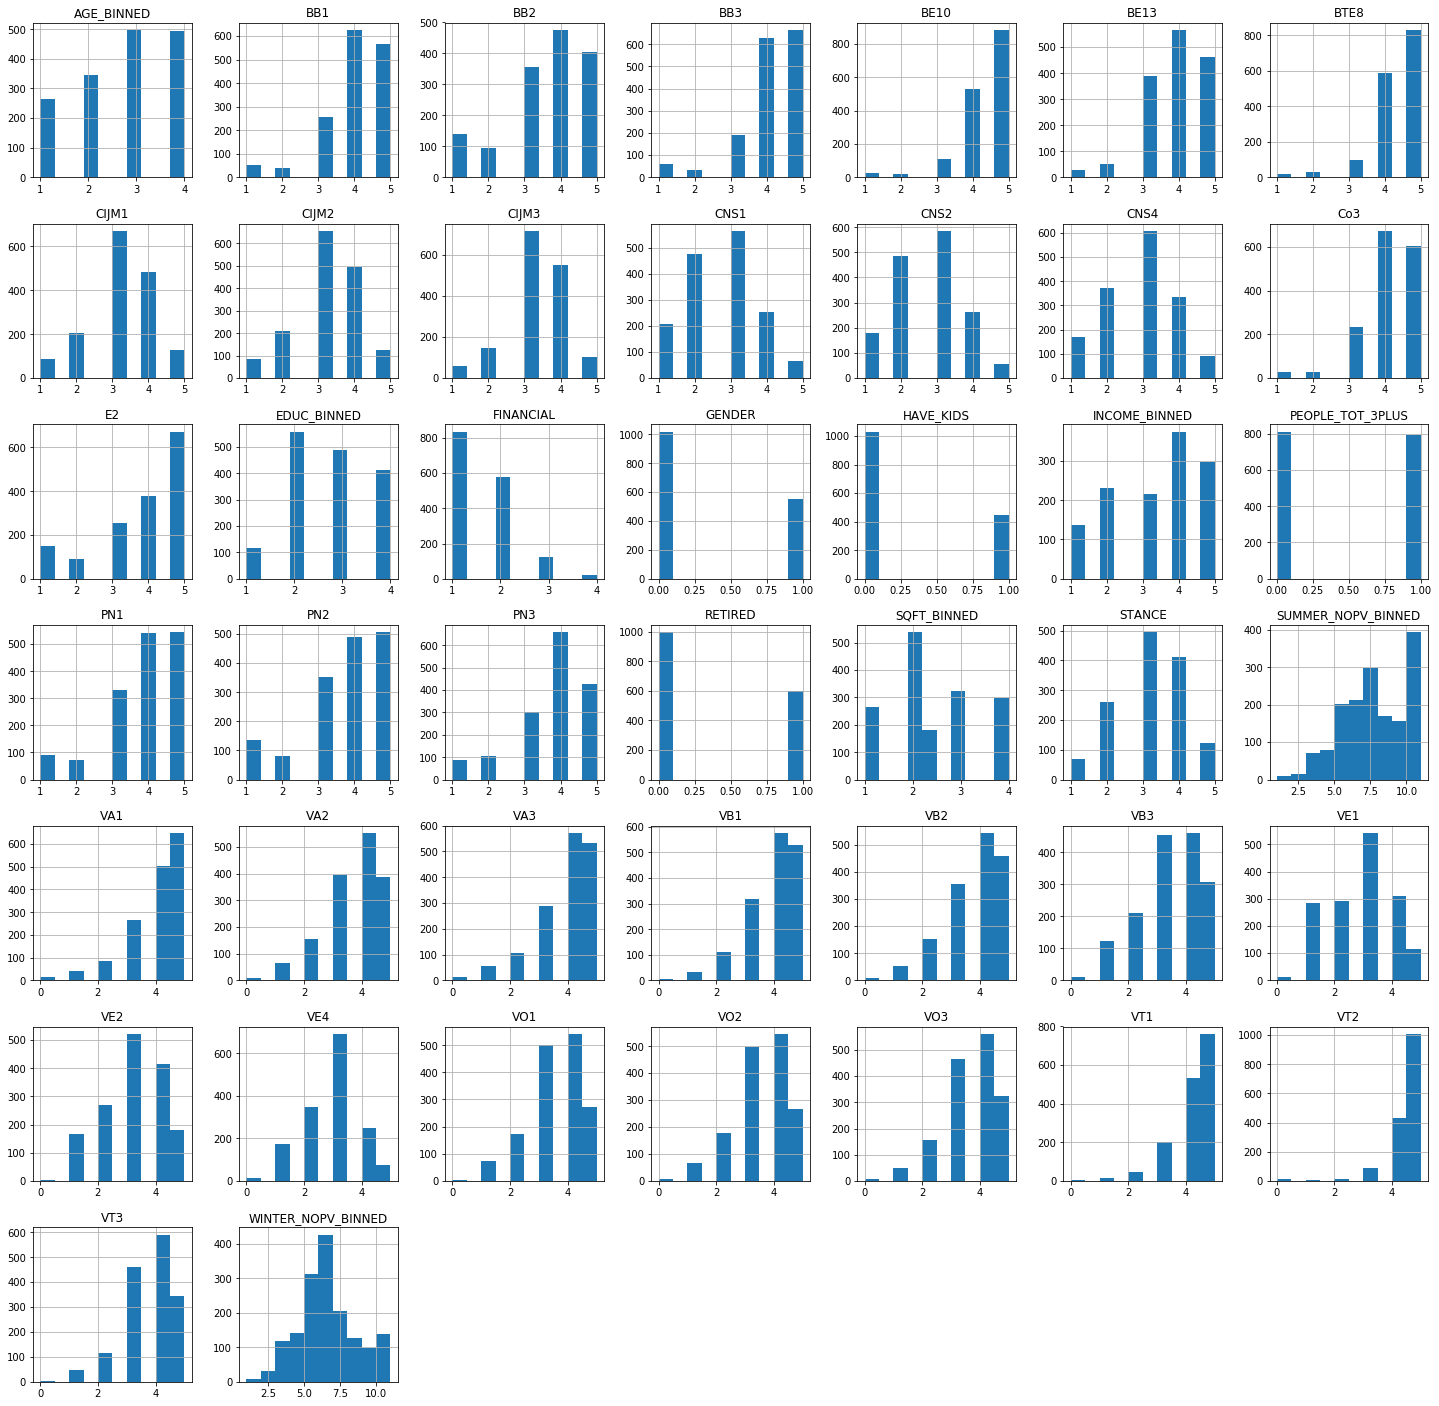

In [72]:
#Let's try combined group histograms (this probably does not show significance or pattern, since it is all mixed together:
plt.rcParams['figure.figsize'] = (25,25)

a_comparable.loc[:, 'WINTER_NOPV_BINNED':].groupby('Purchased').hist()
    
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252B5A0DF28>,
      dtype=object)

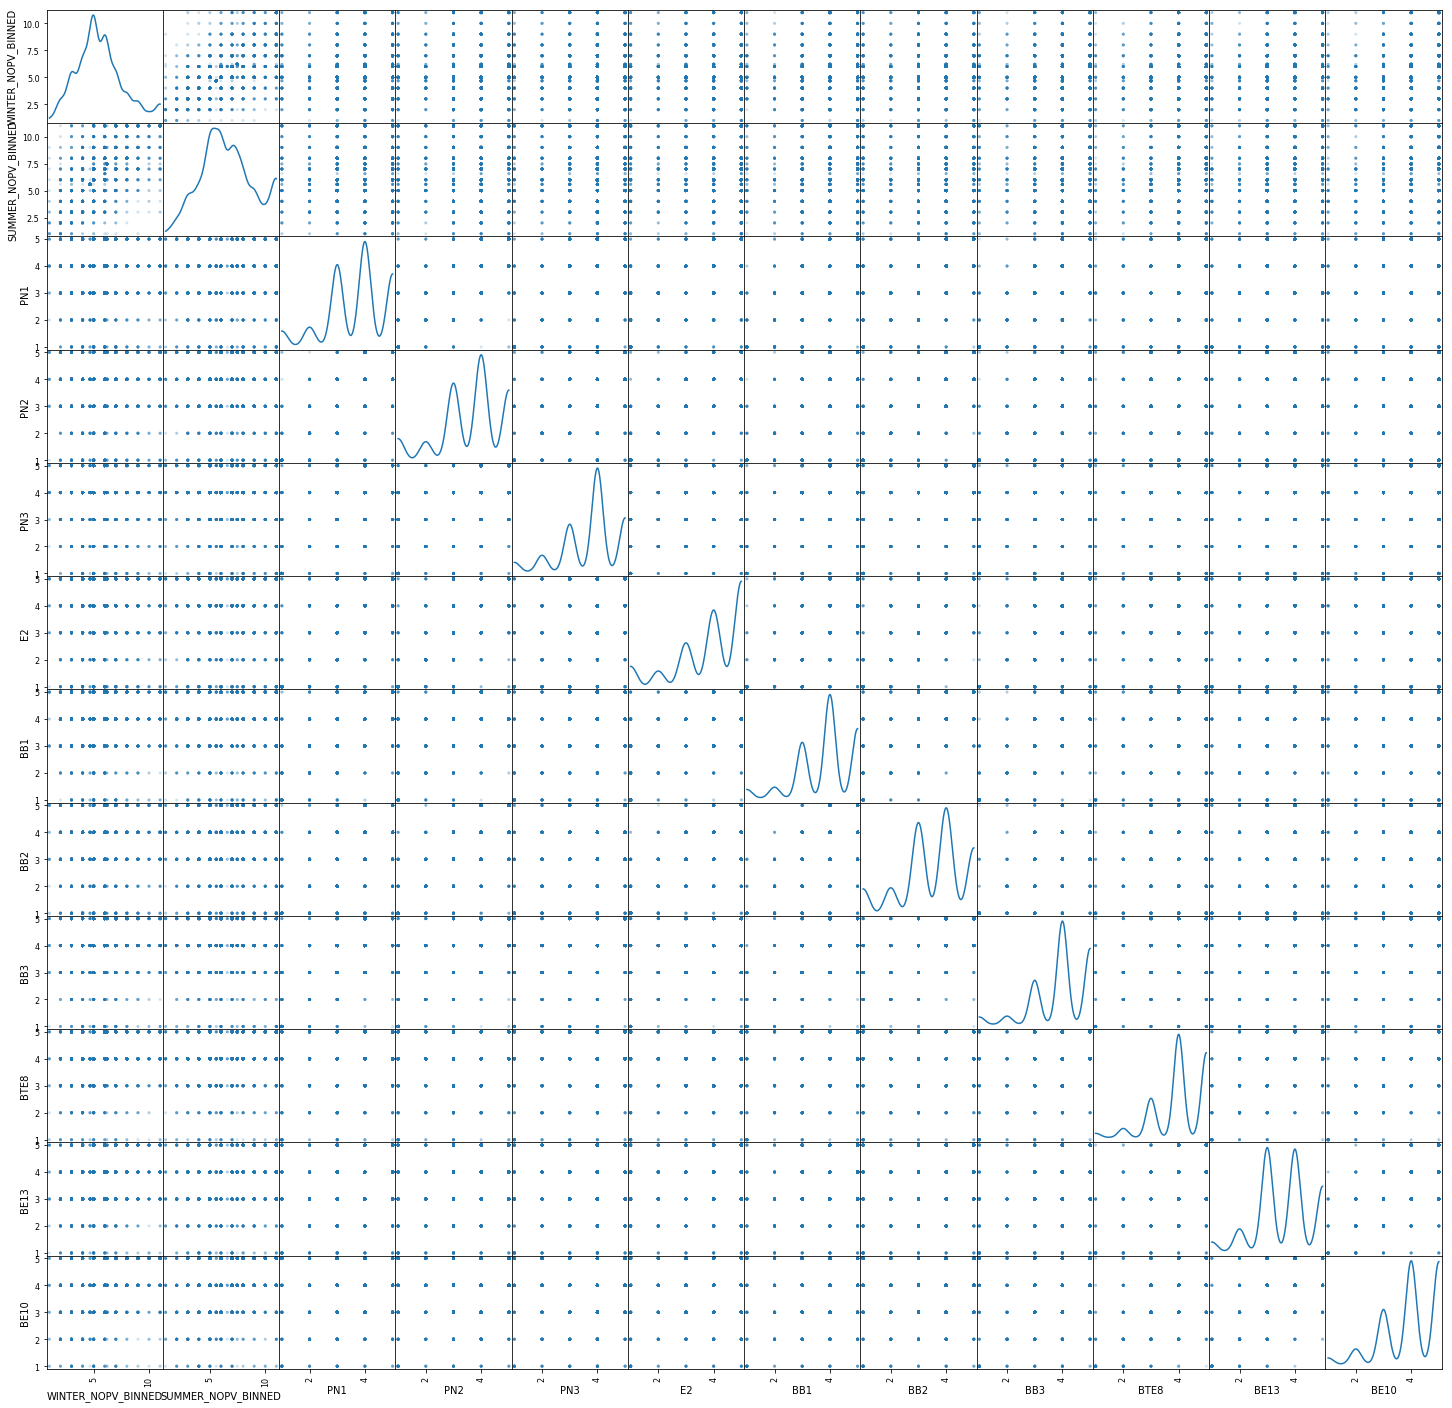

In [73]:
from pandas.plotting import scatter_matrix
#re-run combined, now that groups have had outliers changed to NaN:
combined = pd.concat([a_comparable, c_comparable, g_comparable], sort=False)
scatter_matrix(combined.loc[:,'WINTER_NOPV_BINNED':'BE10'], alpha=0.2, figsize=(25, 25), diagonal='kde')

In [74]:
#not showing anything significant or any correlation.  This may be because the values are categorical, and even one value in each possibility will give this
#grid look to the plots.  May need to find a way to show correlation through categorical means...

In [75]:
combined.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1342.0,3,2,4,4.000000,9.000000,4.0,4.0,4.0,5.0,...,2.0,1.0,0.0,0.0,4.0,4.0,2.0,5.0,1.0,1
1,1343.0,3,2,4,7.000000,11.000000,4.0,4.0,5.0,4.0,...,5.0,0.0,0.0,0.0,4.0,2.0,1.0,4.0,0.0,1
2,1344.0,3,2,4,6.201224,7.469136,4.0,4.0,3.0,4.0,...,NaN,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1
3,1345.0,3,2,4,11.000000,11.000000,1.0,1.0,1.0,3.0,...,5.0,1.0,1.0,0.0,2.0,2.0,2.0,3.0,0.0,1
4,1346.0,3,2,4,5.000000,7.000000,5.0,3.0,4.0,3.0,...,3.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,1


In [76]:
combined_cat = combined[combined.columns].astype('category')
combined_cat.set_index('CASE_ID')
combined_cat['CASE_ID'].rename('ID')
combined_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
count,3528.0,3533,3533,3533,3533.0,3533.0,3488.0,3475.0,3495.0,3433.0,...,3014.0,3533.0,3373.0,3486.0,3533.0,3498.0,3476.0,2921.0,3521.0,3533
unique,3528.0,3,5,4,14.0,14.0,5.0,5.0,5.0,5.0,...,5.0,2.0,2.0,2.0,4.0,4.0,4.0,5.0,2.0,2
top,3533.0,3,2,4,5.0,5.0,4.0,4.0,4.0,5.0,...,3.0,0.0,0.0,0.0,4.0,2.0,1.0,4.0,0.0,0
freq,1.0,1604,1529,1701,754.0,553.0,1244.0,1243.0,1563.0,1349.0,...,1114.0,1940.0,2381.0,1876.0,966.0,1185.0,1733.0,743.0,2321.0,1929


In [ ]:
#Other statistics to run?
#chi sq-select possible features?
#pearsons correlation?
#SpearmanR?

In [ ]:
#Try Chi^2

In [80]:
#gender in group A
a_gender = pd.value_counts(a_comparable['GENDER'].values)
a_gender
#gender in group G
g_gender = pd.value_counts(g_comparable['GENDER'].values)
g_gender
observed = g_gender
expected = a_gender/len(a_comparable) * len(g_comparable)
chi_sq_stat = (((observed - expected)**2)/expected).sum()
print(chi_sq_stat)

356.7684186005771


In [81]:
crit = stats.chi2.ppf(q=0.95, df=1)
print(crit)
p_val = 1- stats.chi2.cdf(x=chi_sq_stat, df=1)
print(p_val)

3.841458820694124
0.0


####  Spearman Correlation

In [82]:
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

In [85]:
feat = a_comparable['INCOME_BINNED']
target = a_comparable['Purchased']

spearmanr_coeficient, p_value = spearmanr(feat, target)

D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [86]:
spearmanr_coeficient, p_value = spearmanr(a_comparable.loc[:1340,:], g_comparable)

D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Program Files\Anaconda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Program Files\Anacond

In [87]:
#not sure why this is still not working...
#a_comparable.info()

In [88]:
#g_comparable.info()

In [89]:
combined_cat.columns

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED',
       'Purchased'],
      dtype='object')

In [90]:
from scipy.stats import chi2_contingency

In [91]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None
        self.chi2 = None
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha, chi2, p):
        result = ""
        if self.p < alpha:
            result = "{0} is IMPORTANT: chi: {1}, p:{2}".format(colX, chi2, p)
        else:
            result = "{0} is NOT an important predictor: chi:{1}, p:{2} (Discard {0} from model)".format(colX, chi2, p)
        print(result)
    
    def TestIndependence(self, colX, colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(X,Y)
        chi2, p, dof, expected = chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index=self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha, chi2, p)



In [93]:
combined_cat['dummy_feat'] = 0 #want to test Spearman importance with this dummy feat

cT = ChiSquare(combined_cat)
testColumns = ['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED', 'dummy_feat']
for  var in testColumns:
    cT.TestIndependence(colX=var, colY='Purchased')

CASE_ID is NOT an important predictor: chi:3532.9999999999995, p:0.47311913926566385 (Discard CASE_ID from model)
GPS_NAC_ADOPTER is IMPORTANT: chi: 3533.0, p:0.0
SURVEY_SOURCE is IMPORTANT: chi: 3532.9999999999995, p:0.0
STATE is IMPORTANT: chi: 752.2638367916815, p:9.742820399500288e-163
WINTER_NOPV_BINNED is IMPORTANT: chi: 496.70905579434753, p:7.317482474607692e-98
SUMMER_NOPV_BINNED is IMPORTANT: chi: 620.1074059051484, p:3.952016857743564e-124
PN1 is IMPORTANT: chi: 181.68377349511286, p:2.3378362815476684e-37
PN2 is IMPORTANT: chi: 140.3475637888732, p:1.5093488049582671e-28
PN3 is IMPORTANT: chi: 45.12670077929245, p:1.3673199140871548e-08
E2 is IMPORTANT: chi: 42.49649490612763, p:4.673424161508254e-08
BB1 is IMPORTANT: chi: 154.9309136582232, p:1.1901109848501854e-31
BB2 is IMPORTANT: chi: 114.722265804061, p:4.1112456142988655e-23
BB3 is IMPORTANT: chi: 197.22701532114309, p:1.1131540995285305e-40
BTE8 is IMPORTANT: chi: 526.2246160150139, p:1.7411075718068735e-111
BE13 is 

In [94]:
#Let's try another chi-sq test:

table = pd.crosstab( combined_cat['Purchased'], combined_cat['BE10'])
chi2, p, dof, expected = chi2_contingency(table.values)
#print('Chi-square statistics %0.9f p_value %0.3f' % (chi2, p))
print('Chi-square statistics {0} p_value {1}'.format(chi2, p))

Chi-square statistics 656.8188159060874 p_value 7.786500563561002e-141
